# K-Means from scratch

This notebook demonstrate how to build a K-means model from scratch. We will use the vetorization to increase the efficiency of this model

In [1]:
import numpy as np
import random 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools as itr

%matplotlib inline

 k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.

We first simulate the data for test

In [92]:
# simulate the data for test
np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([0, 4], [[1, .75],[.75, 1]], num_observations)

X = np.vstack((x1, x2)).astype(np.float32)
y = np.hstack((np.zeros(num_observations, dtype='int32'),
                              np.ones(num_observations, dtype='int32')))

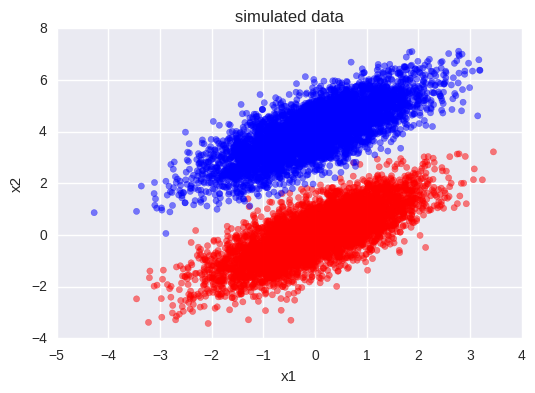

In [93]:
# visualize the simulation
colorPlate = {0:"red",1:"blue"}
colors = [colorPlate[c] for c in y]
plt.scatter(X[:,0], X[:,1], color = colors, alpha=0.5);
plt.title("simulated data");
plt.xlabel("x1");
plt.ylabel("x2");

Based on the data, which indicates potential two clusters, we will build a k-means method

In [94]:
def Kmeans(X, n_clusters=5, n_init=10, max_iter=500, tol=0.0001, seed=10):
    """Kmeans functions
    Input:
        k: number of centers assumed
        X: data to cluster(numpy array)
        max_iter: max number of iterations for k-means
        tol: minimum change of centers
    output:
        c_clusters: matrix, each row is a center for a cluster
        clusters: vector indicating cluster
    """
    # initialize the containers
    np.random.seed(seed)
    np.random.shuffle(X)

    p_centers = []
    c_centers = X[:n_clusters,:]
    for _ in range(max_iter):
        clusters = []
        for i in range(X.shape[0]):
            distance = np.sqrt(np.power((c_centers - X[i,:]),2).sum(axis = 1))
            clusters.append(distance.argsort()[0])
            
        p_centers = c_centers
        c_centers = []
        
        for j in range(n_clusters):
            c_centers.append(X[np.array(clusters)==j,:].mean(axis = 0))
            
        c_centers = np.array(c_centers)
        
        if np.sqrt(np.power((c_centers - p_centers),2).sum(axis=1)).sum() < tol:
            break
            
    return c_centers, clusters

In [95]:
centers, clusters = Kmeans(X, n_clusters=2, n_init=10, max_iter=300, tol=0.0001, seed=20)

In [96]:
centers

array([[ 0.09724738,  4.04454184],
       [-0.07610538,  0.00933981]], dtype=float32)

In [99]:
clusters[:5]

[0, 1, 1, 1, 1]

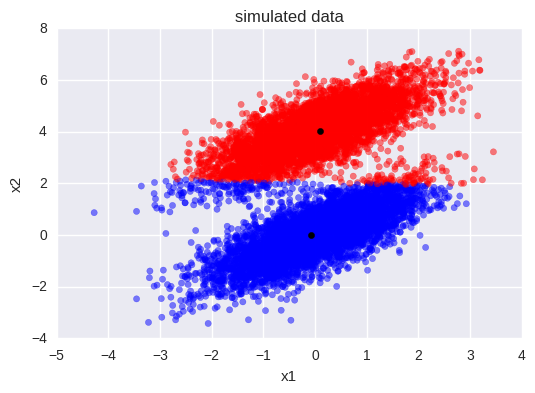

In [100]:
# visualize the simulation
colorPlate = {0:"red",1:"blue"}
colors = [colorPlate[c] for c in clusters]
plt.scatter(X[:,0], X[:,1], color = colors, alpha=0.5);
plt.scatter(centers[:,0], centers[:,1], color = "black");
plt.title("simulated data");
plt.xlabel("x1");
plt.ylabel("x2");

# Experiment with scikit-learn

In [101]:
from sklearn.cluster import KMeans

In [106]:
model = KMeans(n_clusters=2)

In [107]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [108]:
sc_clusters = model.labels_

In [109]:
sc_clusters

array([1, 0, 0, ..., 1, 1, 0], dtype=int32)

In [110]:
sc_centers = model.cluster_centers_

In [111]:
sc_centers

array([[-0.0751839 ,  0.00849986],
       [ 0.09624169,  4.04376459]], dtype=float32)

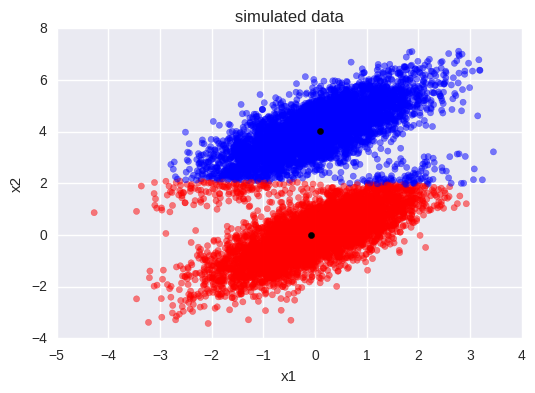

In [112]:
# visualize the simulation
colorPlate = {0:"red",1:"blue"}
colors = [colorPlate[c] for c in sc_clusters]
plt.scatter(X[:,0], X[:,1], color = colors, alpha=0.5);
plt.scatter(sc_centers[:,0], sc_centers[:,1], color = "black");
plt.title("simulated data");
plt.xlabel("x1");
plt.ylabel("x2");